<a href="https://colab.research.google.com/github/sanathshetty444/cyber-bullying/blob/main/CyberBullying_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
os.chdir('/content/gdrive/MyDrive/CBD_dataset/')

#Listing Directory

In [ ]:
os.listdir()

['train', 'valid', 'test']

#pre processing images

In [ ]:
train_path = 'train'
valid_path = 'valid'
test_path = 'test'

In [ ]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['bull', 'non-bull'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['bull', 'non-bull'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['bull', 'non-bull'], batch_size=10, shuffle=False)


Found 195 images belonging to 2 classes.
Found 29 images belonging to 2 classes.
Found 15 images belonging to 2 classes.


In [ ]:
assert train_batches.n == 195
assert test_batches.n == 15
assert valid_batches.n == 29

#Visualizing Images

In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [ ]:
imgs,labels=next(train_batches)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

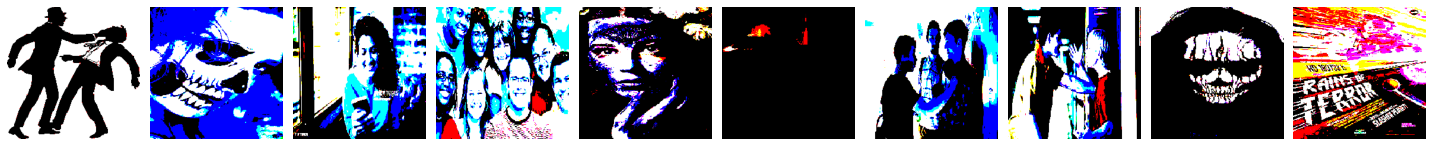

[[1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]


In [ ]:
plotImages(imgs)
print(labels)

#CNN Model

In [ ]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=2, activation='softmax')
])

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
os.chdir('../')

In [ ]:
model.fit(x=train_batches,
    steps_per_epoch=len(train_batches),
    validation_data=valid_batches,
    validation_steps=len(valid_batches),
    epochs=10,
    verbose=2
)

Epoch 1/10
20/20 - 21s - loss: 7.6280 - accuracy: 0.8410 - val_loss: 18.4909 - val_accuracy: 0.6897
Epoch 2/10
20/20 - 14s - loss: 3.3408 - accuracy: 0.8513 - val_loss: 10.3970 - val_accuracy: 0.6207
Epoch 3/10
20/20 - 14s - loss: 2.9460 - accuracy: 0.8564 - val_loss: 23.8841 - val_accuracy: 0.6897
Epoch 4/10
20/20 - 14s - loss: 3.2915 - accuracy: 0.9231 - val_loss: 14.9648 - val_accuracy: 0.7586
Epoch 5/10
20/20 - 14s - loss: 0.5207 - accuracy: 0.9590 - val_loss: 13.1724 - val_accuracy: 0.7586
Epoch 6/10
20/20 - 14s - loss: 0.6363 - accuracy: 0.9744 - val_loss: 7.1683 - val_accuracy: 0.7931
Epoch 7/10
20/20 - 14s - loss: 0.0056 - accuracy: 0.9949 - val_loss: 6.9927 - val_accuracy: 0.7241
Epoch 8/10
20/20 - 14s - loss: 0.0083 - accuracy: 0.9949 - val_loss: 6.5385 - val_accuracy: 0.7241
Epoch 9/10
20/20 - 14s - loss: 1.9948e-04 - accuracy: 1.0000 - val_loss: 6.5996 - val_accuracy: 0.6897
Epoch 10/10
20/20 - 14s - loss: 3.6404e-05 - accuracy: 1.0000 - val_loss: 6.6325 - val_accuracy: 0.7

In [ ]:
predictions=model.predict(x=test_batches,verbose=1)

2/2 [==============================] - 1s 876ms/step


In [ ]:
np.round(predictions)

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [ ]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))


In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[5 1]
 [2 7]]


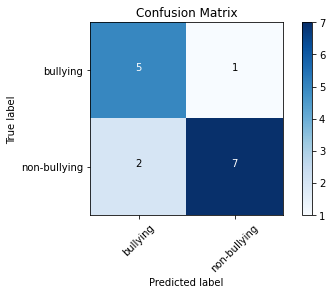

In [ ]:
cm_plot_labels = ['bullying','non-bullying']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

#Building Fine-tuned VGG16 model

In [ ]:
vgg16_model=tf.keras.applications.vgg16.VGG16()

553467904/553467096 [==============================] - 5s 0us/step


In [ ]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
# converting vgg16 functional model to sequential model
model=Sequential()
for layer in vgg16_model.layers[:-1]: #removing last layer since we want only two output whereas vgg16 gives 1000
  model.add(layer)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [ ]:
# freezing the trainable parameters so as to avoid retraining
for layer in model.layers:
  layer.trainable=False

In [ ]:
model.add(Dense(units=2,activation="softmax"))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

#Train the Fine-tuned VGG16 model

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
model.fit(x=train_batches,
    steps_per_epoch=len(train_batches)/10,
    validation_data=valid_batches,
    validation_steps=len(valid_batches),
    epochs=5,
    verbose=2
)

Epoch 1/5
2/2 - 26s - loss: 0.3575 - accuracy: 0.8500 - val_loss: 0.5915 - val_accuracy: 0.6552
Epoch 2/5
2/2 - 24s - loss: 0.5381 - accuracy: 0.8667 - val_loss: 0.5820 - val_accuracy: 0.7241
Epoch 3/5
2/2 - 26s - loss: 0.7828 - accuracy: 0.7500 - val_loss: 0.5771 - val_accuracy: 0.7241
Epoch 4/5
2/2 - 23s - loss: 0.3225 - accuracy: 0.8667 - val_loss: 0.5726 - val_accuracy: 0.7241
Epoch 5/5
2/2 - 26s - loss: 0.4528 - accuracy: 0.7500 - val_loss: 0.5718 - val_accuracy: 0.7241


In [ ]:
predictions=model.predict(x=test_batches,verbose=1)

2/2 [==============================] - 8s 3s/step


In [ ]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))


Confusion matrix, without normalization
[[5 1]
 [2 7]]


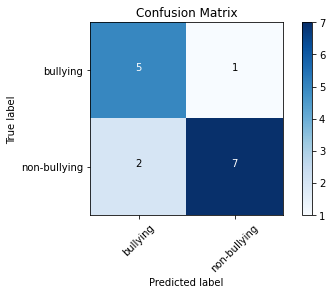

In [ ]:
cm_plot_labels = ['bullying','non-bullying']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

#MobileNet

In [ ]:
mobile=tf.keras.applications.mobilenet.MobileNet()

17227776/17225924 [==============================] - 0s 0us/step


In [ ]:
def prepare_image(file):
    img_path = 'train/bull/'
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

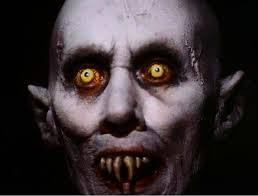

In [ ]:
from IPython.display import Image
Image(filename='train/bull/scary.jpg', width=300,height=200) 

In [ ]:
preprocessed_image = prepare_image('scary.jpg')

predictions = mobile.predict(preprocessed_image)


In [ ]:
results = imagenet_utils.decode_predictions(predictions)


40960/35363 [==================================] - 0s 0us/step


In [ ]:
results

[[('n02895154', 'breastplate', 0.3580731),
  ('n03724870', 'mask', 0.18776105),
  ('n03146219', 'cuirass', 0.115684725),
  ('n04005630', 'prison', 0.06430558),
  ('n06596364', 'comic_book', 0.049952596)]]

#Pre process Images


In [ ]:
train_batches_mobile = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['bull', 'non-bull'], batch_size=10)

valid_batches_mobile = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['bull', 'non-bull'], batch_size=10)

test_batches_mobile = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['bull', 'non-bull'], batch_size=10,shuffle=False)


Found 195 images belonging to 2 classes.
Found 29 images belonging to 2 classes.
Found 15 images belonging to 2 classes.


In [ ]:
mobile.summary()

In [ ]:
x=mobile.layers[-6].output
#preserving the functional model; it contains all layers uptil the layer sixth from bottom and a Dense output layer
output=Dense(units=2,activation="softmax")(x)

In [ ]:
model=Model(inputs=mobile.input,outputs=output)

In [ ]:
for layer in model.layers[:-20]:
  layer.trainable=False

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
os.listdir()

['train', 'valid', 'test']

In [ ]:
model.fit(x=train_batches_mobile,
    steps_per_epoch=len(train_batches_mobile)/10,
    validation_data=valid_batches_mobile,
    validation_steps=len(valid_batches_mobile),
    epochs=30,
    verbose=2
)

Epoch 1/30
2/2 - 3s - loss: 0.0085 - accuracy: 1.0000 - val_loss: 0.6729 - val_accuracy: 0.7586
Epoch 2/30
2/2 - 3s - loss: 0.0852 - accuracy: 0.9500 - val_loss: 0.6288 - val_accuracy: 0.7586
Epoch 3/30
2/2 - 3s - loss: 0.0844 - accuracy: 1.0000 - val_loss: 0.6016 - val_accuracy: 0.7586
Epoch 4/30
2/2 - 3s - loss: 0.0545 - accuracy: 1.0000 - val_loss: 0.5910 - val_accuracy: 0.7586
Epoch 5/30
2/2 - 3s - loss: 0.0295 - accuracy: 1.0000 - val_loss: 0.6012 - val_accuracy: 0.7586
Epoch 6/30
2/2 - 3s - loss: 0.1449 - accuracy: 1.0000 - val_loss: 0.6524 - val_accuracy: 0.7586
Epoch 7/30
2/2 - 3s - loss: 0.1079 - accuracy: 0.9000 - val_loss: 0.6982 - val_accuracy: 0.7586
Epoch 8/30
2/2 - 3s - loss: 0.0422 - accuracy: 1.0000 - val_loss: 0.7555 - val_accuracy: 0.7241
Epoch 9/30
2/2 - 3s - loss: 0.0064 - accuracy: 1.0000 - val_loss: 0.7949 - val_accuracy: 0.7241
Epoch 10/30
2/2 - 3s - loss: 0.0117 - accuracy: 1.0000 - val_loss: 0.8269 - val_accuracy: 0.7241
Epoch 11/30
2/2 - 3s - loss: 0.0449 - a

In [ ]:
predictions=model.predict(x=test_batches_mobile,verbose=1)

2/2 [==============================] - 1s 211ms/step


In [ ]:
cm = confusion_matrix(y_true=test_batches_mobile.classes, y_pred=np.argmax(predictions, axis=-1))


Confusion matrix, without normalization
[[3 3]
 [0 9]]


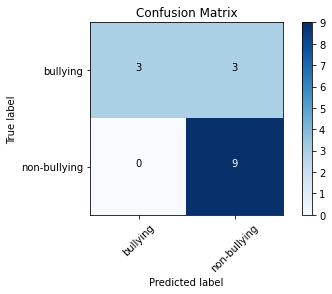

In [ ]:
cm_plot_labels = ['bullying','non-bullying']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

#Data Augmentation

In [ ]:
gen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.15, zoom_range=0.1, 
    channel_shift_range=10., horizontal_flip=True)